# Homework 3: Using ggplot

This homework assignment is designed to get you comfortable working with `ggplot` for generating data visualizations.

We will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/README.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Color, plot type and layers (4 points)

Install and load the `gapminder` dataset. Look at the first few rows of the data frame.

In [75]:
install.packages("gapminder")
install.packages("ggthemes")
library(ggthemes)
library("gapminder")
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(psych)
library(reshape2)
library(dplyr)





The downloaded binary packages are in
	/var/folders/9x/yng26nj50sq1bzz3bjr6bgkm0000gn/T//RtmpWCOCpm/downloaded_packages

The downloaded binary packages are in
	/var/folders/9x/yng26nj50sq1bzz3bjr6bgkm0000gn/T//RtmpWCOCpm/downloaded_packages


In [20]:
head(gapminder)
summary(gapminder)

country     continent year lifeExp pop      gdpPercap
1 Afghanistan Asia      1952 28.801   8425333 779.4453 
2 Afghanistan Asia      1957 30.332   9240934 820.8530 
3 Afghanistan Asia      1962 31.997  10267083 853.1007 
4 Afghanistan Asia      1967 34.020  11537966 836.1971 
5 Afghanistan Asia      1972 36.088  13079460 739.9811 
6 Afghanistan Asia      1977 38.438  14880372 786.1134

        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

Now, let's create a basic scatterplot using `ggplot2` that shows how life expectancy has changed over time.

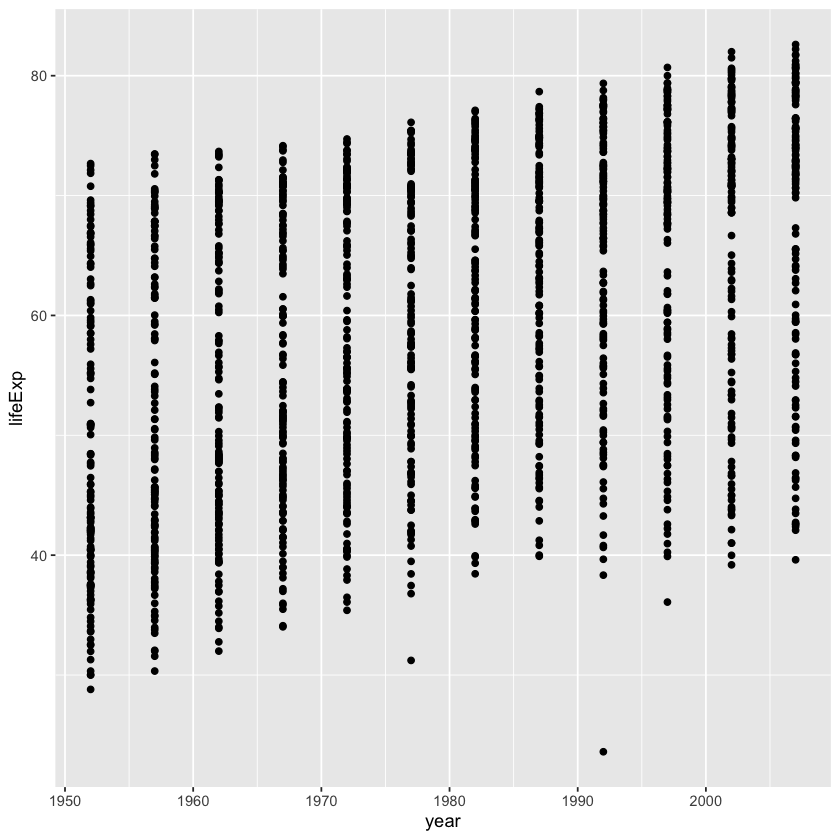

In [14]:
gapminder %>%
ggplot(aes(x = year, y = lifeExp)) +
geom_point()



We can add another layer of detail by using color to indicate continent. Modify the code from the previous question to to do so. 

What trends can you identify in the data? 

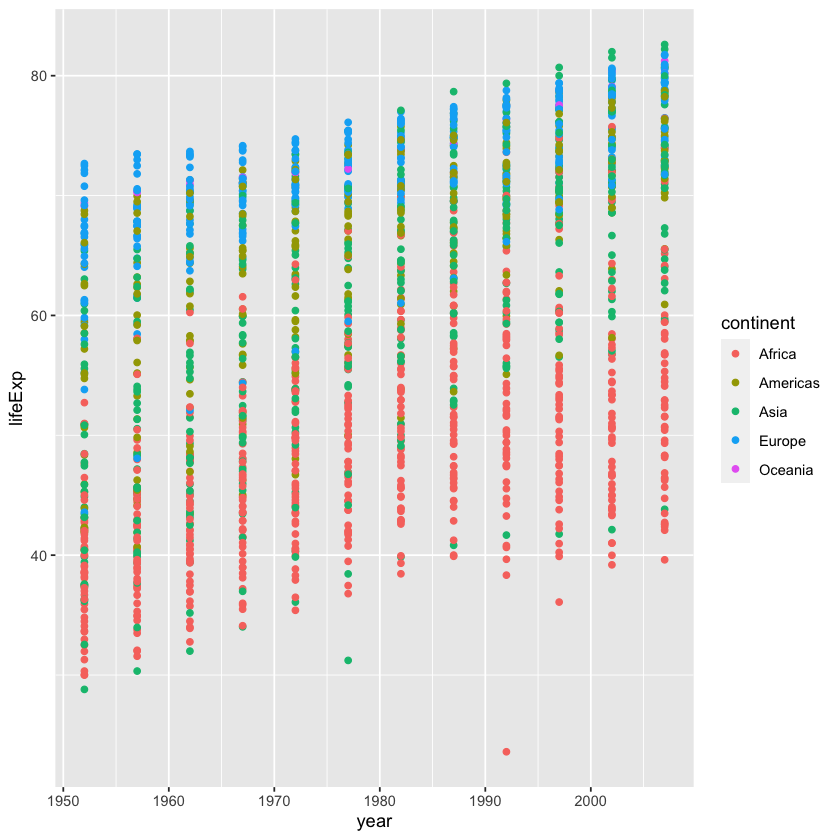

In [19]:
gapminder %>%
ggplot(aes(x = year, y = lifeExp, color = continent)) +
geom_point()


Every continent appears to have a generally upward trend in life expectancy.  European countries consistently have a higher life expectancy, while African countries generally have lower life expectancies than most European and some Asian/American countries.  Asia and the Americas are relatively evenly spread throughout the middle of the life expectancy range.  However, it is difficult to infer much from this type of plot.

Using a scatterplot probably isn’t the best type of plot for effectively visualizing change over time. Instead, modify the code from the previous question to create a line plot. 

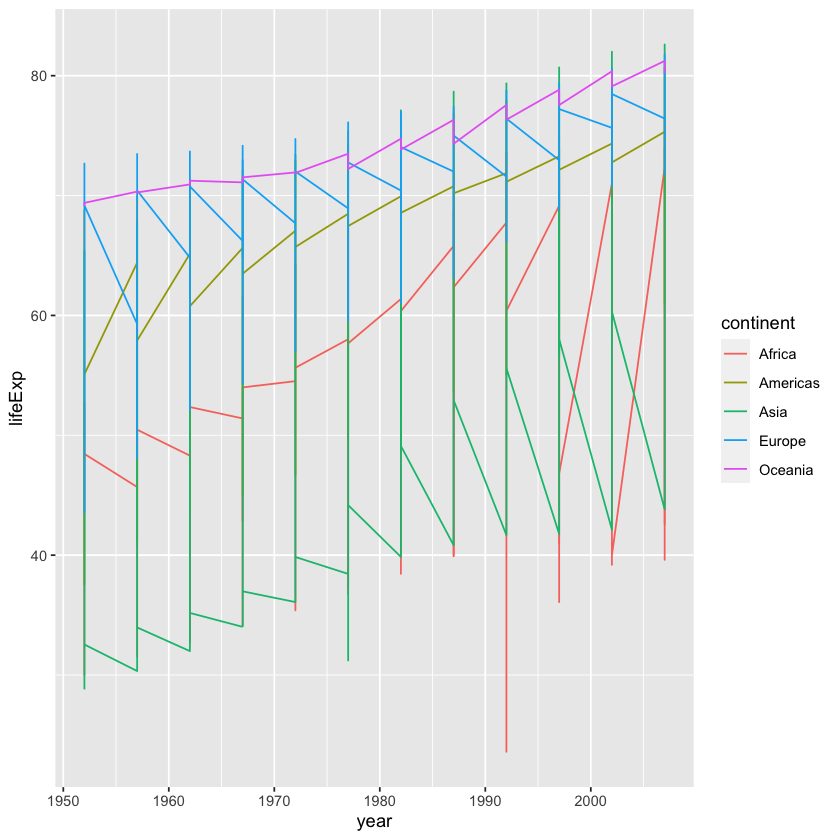

In [21]:
gapminder %>%
ggplot(aes(x = year, y = lifeExp, color = continent)) +
geom_line()


Hmm, this plot looks a bit weird and unexpected, making it difficult for us to easily interpret the data trends. What is causing this?

In the year 'bins' of this dataset, there are multiple countries within each continent group, which gives the line plot these weird asymptotes. This would only work if we plotted the average life expectancy from each continent for each year.

Now, let’s try to separate the data by country, plotting one line for each country. Modify the code from the previous plot to do so.

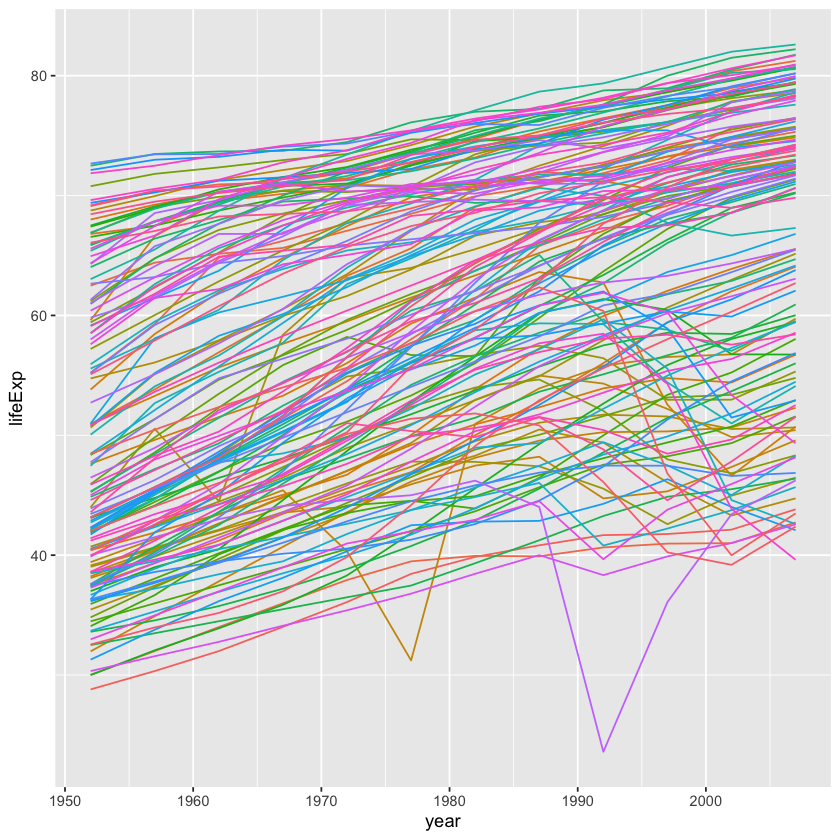

In [23]:
gapminder %>%
ggplot(aes(x = year, y = lifeExp, color = country)) +
geom_line(show.legend = FALSE)


But what if we want to visualize both lines and points on our graph? There are two primary ways to do this - taking advantage of what we know about using layers for ggplot (each layer is drawn on top of the previous layer). 

* Method 1: Plot black points on top of the colorful lines
* Method 2: Plot black points underneath the colorful lines

Modify the code from the previous question to create two plots, one for each method.

*Hint: to control the color of the points, think about where the aesthetic color attribute should be located e.g., in the global plot options or in a specific layer.*

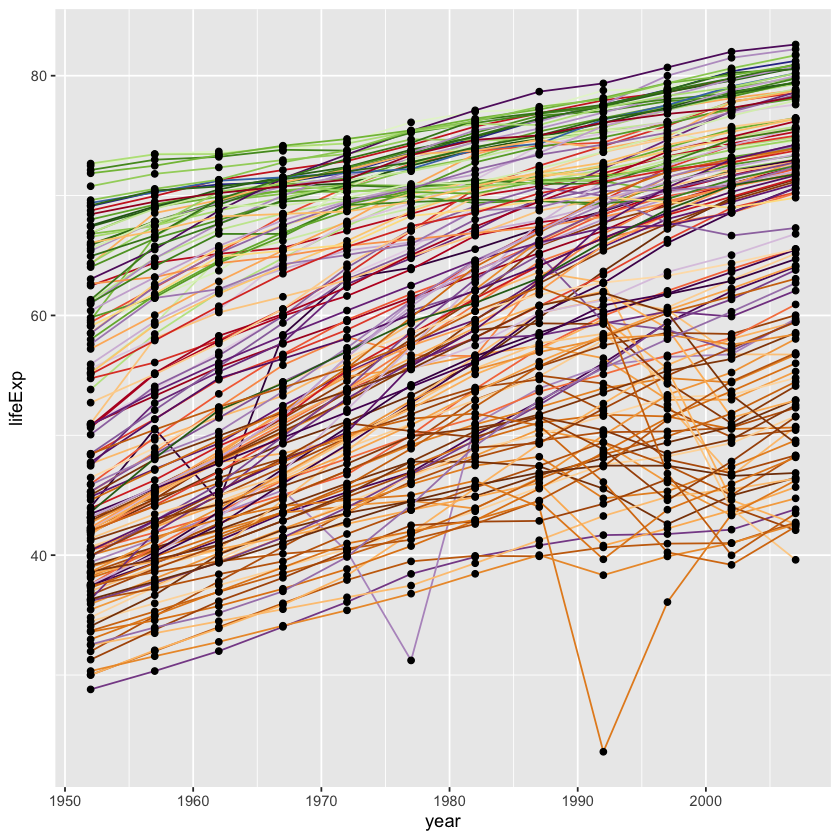

In [37]:
#method 1

gapminder %>%
ggplot(aes(x = year, y = lifeExp, color = country)) +  
geom_line(show.legend = FALSE) +
geom_point(show.legend = FALSE, color = 'black') + 
scale_color_manual(values = country_colors)


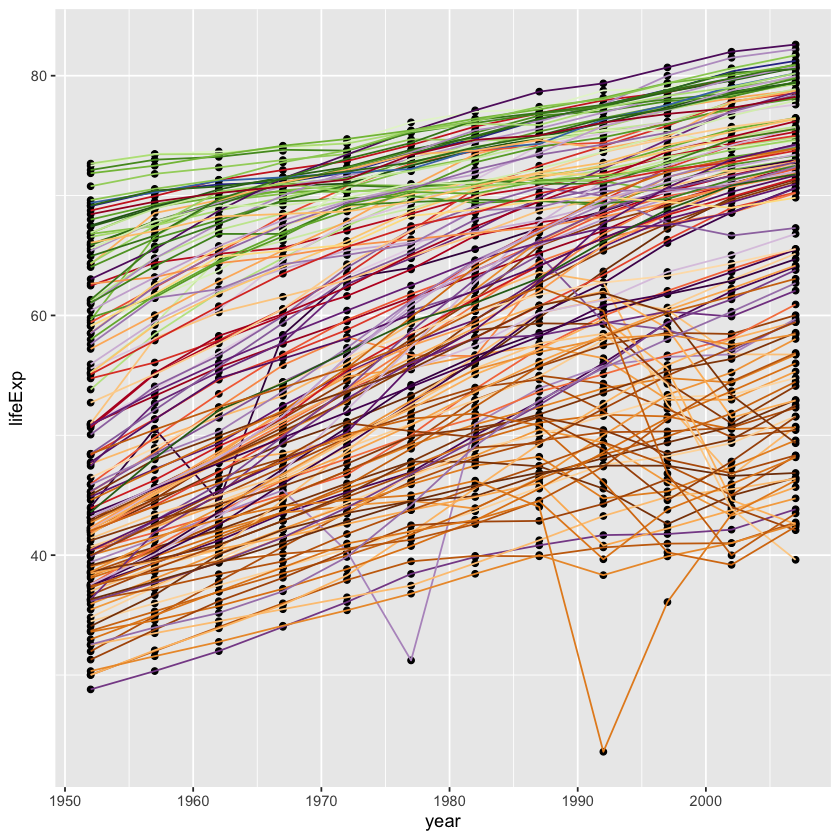

In [38]:
#method 2

gapminder %>%
ggplot(aes(x = year, y = lifeExp, color = country)) +  
geom_point(show.legend = FALSE, color = 'black') +
geom_line(show.legend = FALSE) +
scale_color_manual(values = country_colors)


---
# 2. Adding statistics (3 points)

`ggplot2` allows easy overlay of statistical models on top of the data. 

The graph below shows the relationship between life expectency and GDP per capita:

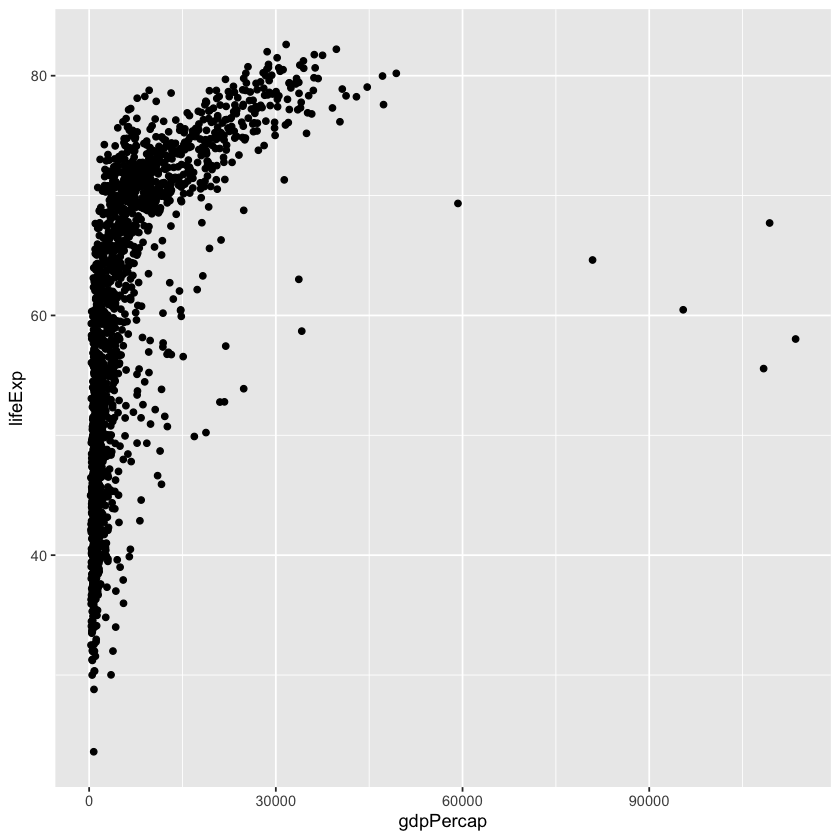

In [39]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

However, the data points are squished close together on the left side of the graph, so it's hard to see the actual relationship we're interested in.

To fix this, we can change the scale of x-axis units using the scale functions. We can also make the data points transparent using the alpha function. This is helpful when there is a large amount of clustered data.

Modify the code above to incorporate these two changes (scale and transparency).

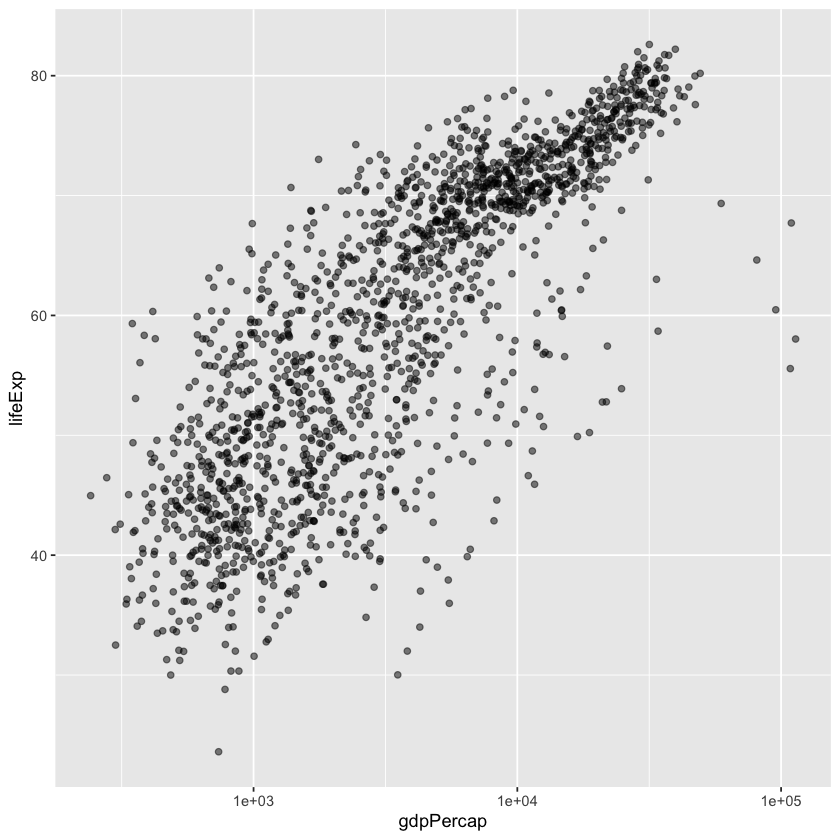

In [46]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.5) +
  scale_x_continuous(trans = 'log10') 

# Is a log tranformation ok here?  I'm not sure how else to change the scale such that 
# the data is easier to visualize without putting a limit and removing outliers from the graph.



Already we can more easily visualize the trend in the data. 

Next, let's overlay statistics by fiting a simple relationship to the data. Modify the code from the previous question by adding a `geom_smooth` layer.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



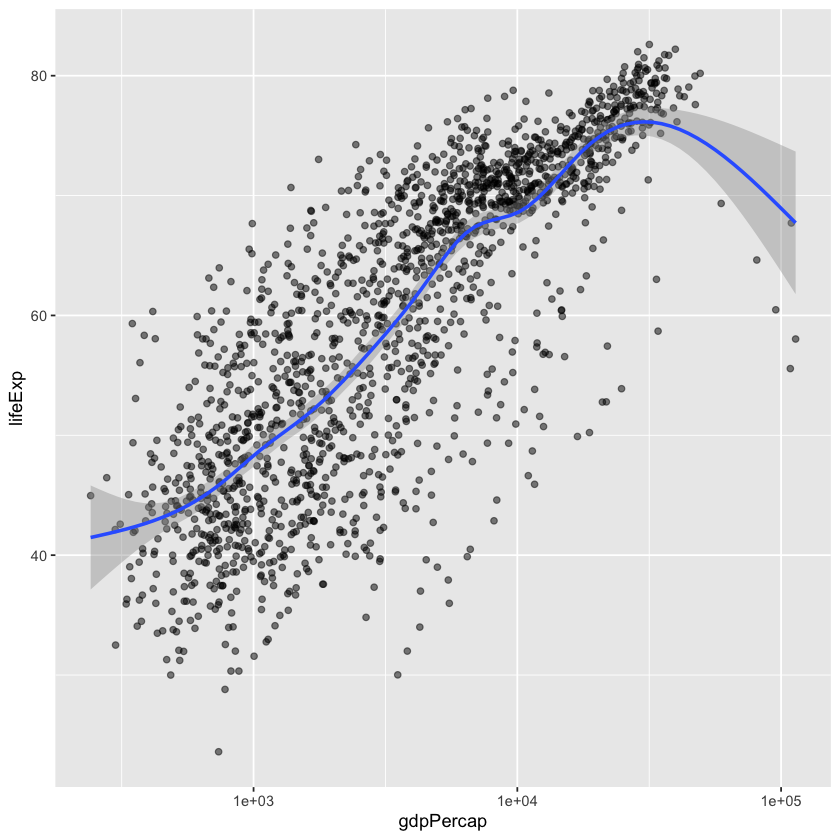

In [50]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.5) +
  scale_x_continuous(trans = 'log10') +
  geom_smooth() 



Again, we can add a layer of detail by introducing separate colors for each continent. We can also create individual trendlines for each continent, instead of only one trendline.

Modify the code from the previous question to add these elements. 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



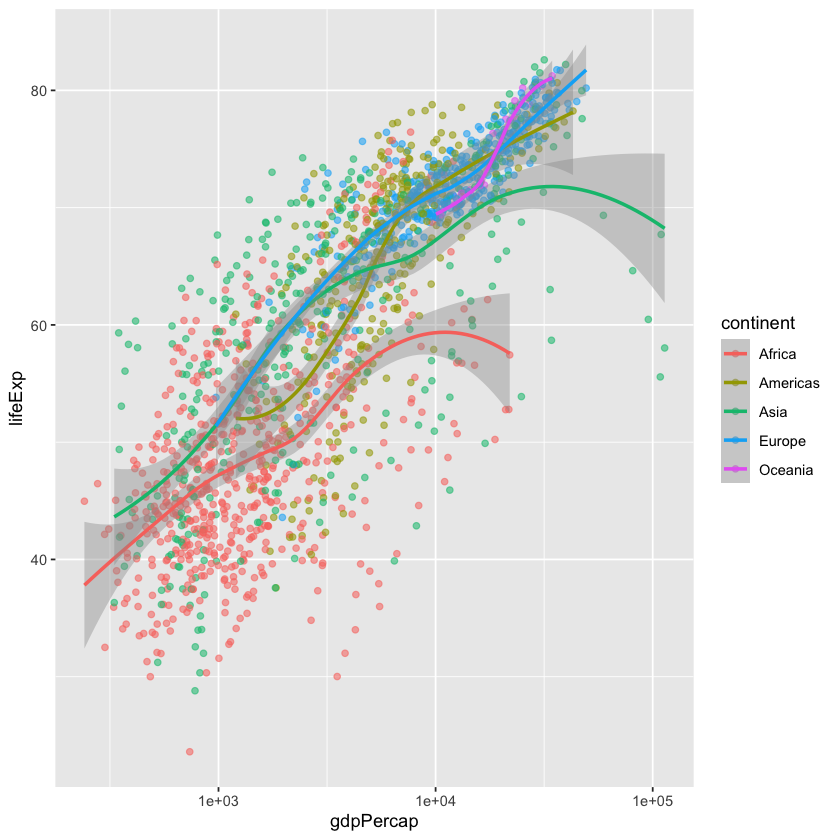

In [58]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point(alpha = 0.55) +
  scale_x_continuous(trans = 'log10') +
  geom_smooth() #+
  #scale_color_manual(values = continent_colors) 



---
# 3. Multipanel figures (3 points)

In question 1, we visualized the change in life expectancy over time for every country in one plot. An alternative method is to use facet panels to split each country into its own plot.

First, create a subset of data that only includes the 25 countries from the `Americas` continent. Now we can add a `facet_wrap` layer to our line plot to create the panels by country. Additionally, to make the x-axis values easier to read, add a `theme` layer to rotate the text by 45 degrees.

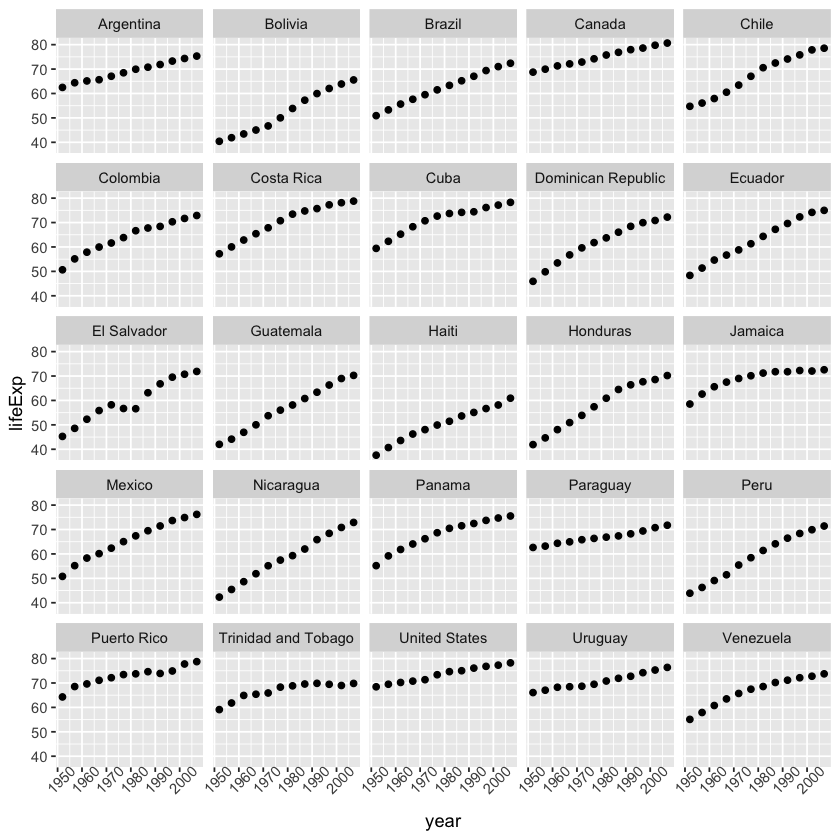

In [77]:
gapminderplot <- gapminder %>%
filter(continent == "Americas")

ggplot(gapminderplot, aes(x = year, y = lifeExp)) +
geom_point() +
facet_wrap(~ country, ncol = 5) +
theme(axis.text.x = element_text(angle = 45))

Imagine that we wanted to publish this figure in a manuscript. Make the following changes to the code from the previous question to create a cleaner figure:

* Change the y-axis label (using `labs` layer)
* Add a figure title (using `labs` layer)
* Add a legend (using `labs` layer)
* Rotate x-axis value text to 90 degrees

*Hint: legend titles are set using the same names used in the aes specification. So, we need to add a `color` aes mapping to the global plot definition and reference this in the `labs` layer to specify the legend name.*

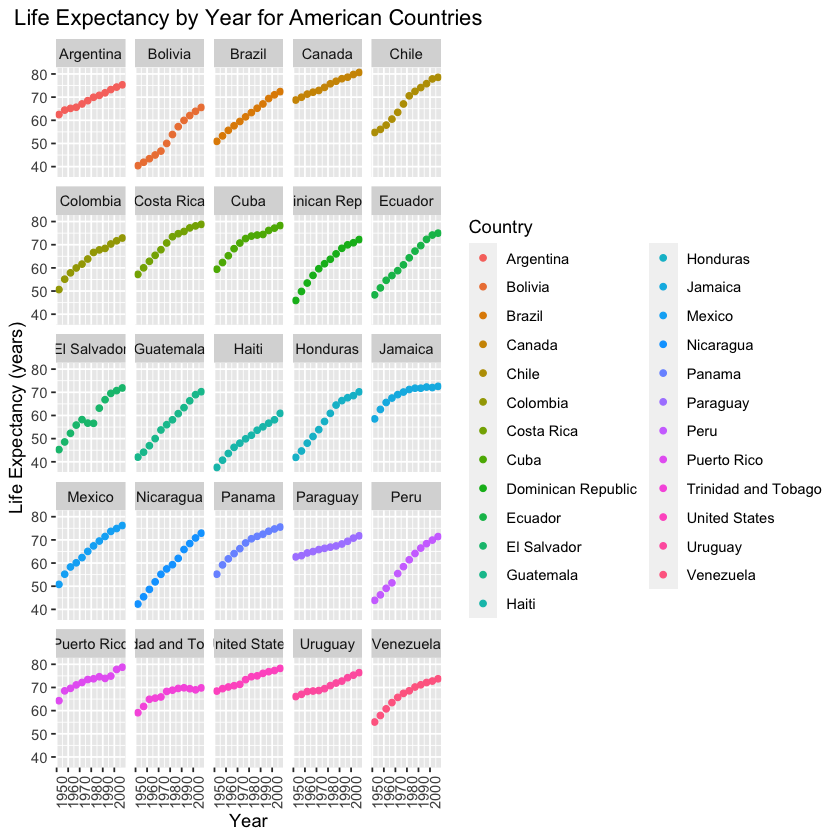

In [91]:
ggplot(gapminderplot, aes(x = year, y = lifeExp, color = country)) +
geom_point() +
facet_wrap(~ country, ncol = 5) +
theme(axis.text.x = element_text(angle = 90), plot.title = element_text(hjust = 0.5)) +
labs(title = 'Life Expectancy by Year for American Countries', x = 'Year', y = 'Life Expectancy (years)', 
    color = 'Country')



Now let's look at how life expectancy varies by continent over time. Create a multipanel figure where each panel contains five boxplots (one for each continent) and each panel represents one year of data. Include a legend instead of x-axis title and labels.

*Hint: the `theme` layer allows you to set attributes as `element_blank()`.*

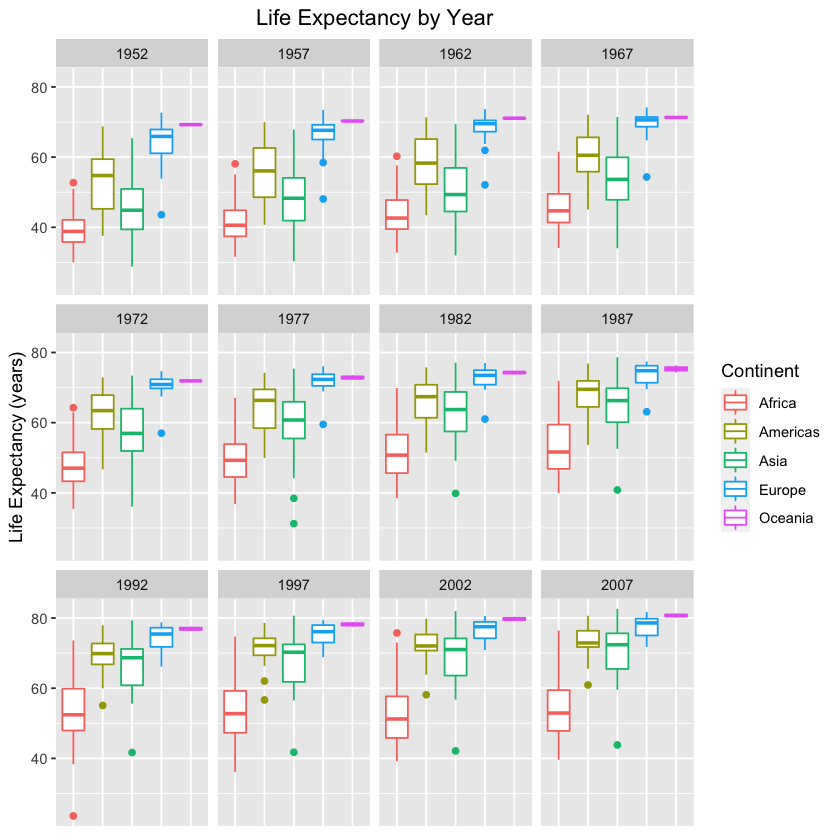

In [113]:
ggplot(gapminder, aes(x = continent, y = lifeExp, color = continent)) +
geom_boxplot() +
facet_wrap(vars(year)) +
theme(plot.title = element_text(hjust = 0.5), axis.title.x = element_blank(), 
      axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
labs(title = 'Life Expectancy by Year', y = 'Life Expectancy (years)', color = 'Continent')



That's all for Homework 3! When you are finished, save the notebook as Homework3.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas. 

**DUE:** 5pm EST, Feb 24, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*